In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences

In [2]:
os.listdir('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images')


['.DS_Store', 'flickr30k_images', 'results.csv']

In [3]:
metadata = pd.read_csv('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/results.csv',delimiter='|',engine='python')
metadata = metadata.dropna()
is_NaN = metadata.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = metadata[row_has_NaN]
print(rows_with_NaN)
metadata.head()

Empty DataFrame
Columns: [image_name,  comment_number,  comment]
Index: []


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [4]:
#from tensorflow.keras.utils import load_img

In [5]:
def load_image(name):
    img=image.load_img(name,target_size=(32,32,3))
    img=image.img_to_array(img)
    img=np.reshape(img,(32*32*3))
    return img

In [6]:
print(len(metadata['image_name'].unique()))
print(len(metadata['image_name']))

31783
158914


In [7]:
image_arr = []
sentence_arr = []
for ind in range(5000):
    if ind % 5 != 0:
        continue
    image_location = (metadata.iloc[ind,:]['image_name'])
    sentence = (metadata.iloc[ind,:][' comment'])
    
    
    image_arr.append(load_image('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/flickr30k_images/flickr30k_images/'+str(image_location)) )
    sentence_arr.append('<SOS>'+sentence+'<EOS>')
    
        
Images =  np.array(image_arr)


In [8]:
image_arr=load_image('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/flickr30k_images/36979.jpg')

In [9]:
image_arr.shape

(3072,)

In [10]:
Images.shape

(1000, 3072)

In [11]:
len(sentence_arr)

1000

In [12]:
sentence_arr[0]

'<SOS> Two young guys with shaggy hair look at their hands while hanging out in the yard .<EOS>'

In [13]:
sentence_arr[1]

'<SOS> Several men in hard hats are operating a giant pulley system .<EOS>'

In [14]:
sentence_arr[2]

'<SOS> A child in a pink dress is climbing up a set of stairs in an entry way .<EOS>'

In [15]:
metadata.iloc[0:15,:]


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [16]:
def tokenize(x):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(x)
    t=tokenizer.texts_to_sequences(x)
    return t, tokenizer

In [17]:
text_tokenized,tokenizer=tokenize(['ehasan is reza brother','reza is student'])
print('text_tokenized is :',text_tokenized)
print('tokenizer is :',tokenizer)

text_tokenized is : [[3, 1, 2, 4], [2, 1, 5]]
tokenizer is : <keras.preprocessing.text.Tokenizer object at 0x1178e6130>


In [18]:
def pad(x, length=None):
    padding=pad_sequences(x,padding='post',maxlen=length)
    return padding

In [19]:
def preprocess(sentences):
    text_tokenized, text_tokenizer= tokenize(sentences)
    text_pad=pad(text_tokenized)
    return text_pad , text_tokenizer
Sentence, token_Sentence=preprocess(sentence_arr)

In [20]:
print("Sentence vocabulary size:", len(token_Sentence.word_index))
print("Sentence Longest sentence size:", len(Sentence[0]))

Sentence vocabulary size: 2302
Sentence Longest sentence size: 51


In [21]:
type(token_Sentence)

keras.preprocessing.text.Tokenizer

In [22]:
Images.shape , Sentence.shape

((1000, 3072), (1000, 51))

In [23]:
Sentence

array([[  2,  17,  21, ...,   0,   0,   0],
       [  2, 105,  37, ...,   0,   0,   0],
       [  2,   1,  49, ...,   0,   0,   0],
       ...,
       [  2,   1, 296, ...,   0,   0,   0],
       [  2,   1,  21, ...,   0,   0,   0],
       [  2,   1,  15, ...,   0,   0,   0]], dtype=int32)

In [24]:
def create_batch(src, tar , batchsize , i):
    src, tar =  np.transpose(src[(i-1)*batchsize : (i-1)*batchsize + batchsize]) , np.transpose(tar[(i-1)*batchsize : (i-1)*batchsize + batchsize])
    return torch.tensor(src).long(),torch.tensor(tar).long()

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
class Transformer(nn.Module):
    def __init__(
        self,
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
        max_len_s,
        max_len_t,
        device,
    ):
        super(Transformer, self).__init__()
        self.src_word_embedding = nn.Embedding(src_vocab_size, embedding_size)
        self.src_position_embedding = nn.Embedding(max_len_s, embedding_size)
        self.trg_word_embedding = nn.Embedding(trg_vocab_size, embedding_size)
        self.trg_position_embedding = nn.Embedding(max_len_t, embedding_size)
        
        self.device = device
        self.transformer = nn.Transformer(
            embedding_size,
            num_heads,
            num_encoder_layers,
            num_decoder_layers,
            forward_expansion,
            dropout,
        )
        self.fc_out = nn.Linear(embedding_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.src_pad_idx = src_pad_idx

    def make_src_mask(self, src):
        src_mask = src.transpose(0, 1) == self.src_pad_idx

        # (N, src_len)
        return src_mask.to(self.device)

    def forward(self, src, trg):
        src_seq_length, N = src.shape
        trg_seq_length, N = trg.shape

        src_positions = (
            torch.arange(0, src_seq_length)
            .unsqueeze(1)
            .expand(src_seq_length, N)
            .to(self.device)
        )
        trg_positions = (
            torch.arange(0, trg_seq_length)
            .unsqueeze(1)
            .expand(trg_seq_length, N)
            .to(self.device)
        )

        embed_src = self.dropout(
            (self.src_word_embedding(src) + self.src_position_embedding(src_positions))
        )
        embed_trg = self.dropout(
            (self.trg_word_embedding(trg) + self.trg_position_embedding(trg_positions))
        )

        src_padding_mask = self.make_src_mask(src)
        trg_mask = self.transformer.generate_square_subsequent_mask(trg_seq_length).to(self.device)
        out = self.transformer(
            embed_src,
            embed_trg,
            src_key_padding_mask=src_padding_mask,
            tgt_mask=trg_mask,
        )
        out = self.fc_out(out)
        return out

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [27]:
# Model hyperparameters
src_vocab_size = 256
trg_vocab_size = len(token_Sentence.word_index)
embedding_size = 512
num_heads = 8
num_encoder_layers = 3
num_decoder_layers = 3
dropout = 0.10
max_len_s = Images.shape[1]
max_len_t = len(Sentence[0])
forward_expansion = 4
src_pad_idx = 0

In [28]:
# Training hyperparameters
num_epochs = 10000
learning_rate = 3e-4
batch_size = 1

In [29]:
model = Transformer(
    embedding_size,
    src_vocab_size,
    trg_vocab_size,
    src_pad_idx,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    forward_expansion,
    dropout,
    max_len_s,
    max_len_t,
    device,
).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=10, verbose=True
)

pad_idx = 0
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx).cuda()

In [30]:
import time
def train():
    model.train() # Turn on the train mode
    total_loss = 0
    start_time = time.time()
    for i in range(1, 999):
        src,tar = create_batch(Images,Sentence, batch_size , i)
        src = src.to(device)
        tar = tar.to(device)
        optimizer.zero_grad()
        output = model(src,tar)
        loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        cur_loss = loss.item()
        total_loss += cur_loss
        log_interval = 100
        if i % log_interval == 0 and i > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  's/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, i, (src.shape[1]) // batch_size, 
                    elapsed  / log_interval,
                    cur_loss, math.exp(cur_loss)))
            start_time = time.time()
    return total_loss

In [31]:
import math
for epoch in range(1, 3):
    epoch_start_time = time.time()
    loss = train()
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | Training loss {:5.2f} | '
          .format(epoch, (time.time() - epoch_start_time),
                                     loss))

| epoch   1 |   100/    1 batches | s/batch  2.06 | loss  4.13 | ppl    62.48
| epoch   1 |   200/    1 batches | s/batch  2.07 | loss  3.54 | ppl    34.32
| epoch   1 |   300/    1 batches | s/batch  2.07 | loss  3.32 | ppl    27.58
| epoch   1 |   400/    1 batches | s/batch  2.05 | loss  1.79 | ppl     5.98
| epoch   1 |   500/    1 batches | s/batch  2.05 | loss  2.58 | ppl    13.14
| epoch   1 |   600/    1 batches | s/batch  2.06 | loss  2.37 | ppl    10.67
| epoch   1 |   700/    1 batches | s/batch  2.06 | loss  1.46 | ppl     4.33
| epoch   1 |   800/    1 batches | s/batch  2.06 | loss  0.74 | ppl     2.10
| epoch   1 |   900/    1 batches | s/batch  2.06 | loss  1.20 | ppl     3.33
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 2054.93s | Training loss 2537.37 | 
| epoch   2 |   100/    1 batches | s/batch  2.06 | loss  0.87 | ppl     2.38
| epoch   2 |   200/    1 batches | s/batch  2.06 | loss  1.29 | pp

In [32]:
torch.save(model.state_dict(), "/Users/reza/Desktop/PhD_thesis/Base_ImageCaptioning/base")

In [33]:
torch.save(model.state_dict(), "/Users/reza/Desktop/PhD_thesis/Base_ImageCaptioning/base.pth")

In [34]:
torch.save(model,  "/Users/reza/Desktop/PhD_thesis/Base_ImageCaptioning/wholeModel.pth")

In [35]:
def display_image(name):
    img = image.load_img(name,target_size=(512,512,3))
    img = image.img_to_array(img)
    img = img/255
    plt.imshow(img)

In [36]:
def evaluate(index):
    image_location, sent = metadata.iloc[index,0],metadata.iloc[index,2]
    image_arr = []
    img = load_image('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/flickr30k_images/flickr30k_images/'+str(image_location))
    image_arr.append(img)
    img_arr = np.array(image_arr)
    sentence = []
    sentence.append(sent)
    sentence[0] = '<SOS> '+sentence[0]+'<EOS>'
    sentence = pad(token_Sentence.texts_to_sequences(sentence) , length = max_len_t)
    src , tar = create_batch(img_arr,sentence, 1,1)
    src = src.to(device)
    tar = tar.to(device)
    model.eval()
    output =  model(src,tar)
    loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
    sentence_formed = ''
    val, ind = torch.max(output.view(-1, output.shape[2]), 1)
    for word in ind:
        #print('--->'+sentence_formed+'    '+str(word.item()))
        if word.item() == 3: # EOS
                break
        for key, value in token_Sentence.word_index.items():
            #print(value == word.item())
            if value == word.item() and value != 2: # sos
                sentence_formed = sentence_formed + key +' '
                break
    display_image('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/flickr30k_images/flickr30k_images/'+str(image_location))
    return sentence_formed , loss

In [73]:
metadata_reza = pd.read_csv('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/results.csv',delimiter='|',engine='python')
metadata_reza = metadata_reza.dropna()
is_NaN = metadata_reza.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = metadata_reza[row_has_NaN]
#print(rows_with_NaN)


metadata_reza.loc[0]=["001.jpg",'0','A young woman wearing the glasses is smiling.']
metadata_reza.head()

def evaluate_reza(index):
    
    
    image_location, sent = metadata_reza.iloc[index,0],metadata_reza.iloc[index,2]
    image_arr = []
    img = load_image('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/flickr30k_images/flickr30k_images/'+str(image_location))
    image_arr.append(img)
    img_arr = np.array(image_arr)
    sentence = []
    sentence.append(sent)
    sentence[0] = '<SOS> '+sentence[0]+'<EOS>'
    sentence = pad(token_Sentence.texts_to_sequences(sentence) , length = max_len_t)
    src , tar = create_batch(img_arr,sentence, 1,1)
    src = src.to(device)
    tar = tar.to(device)
    model.eval()
    output =  model(src,tar)
    loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
    sentence_formed = ''
    val, ind = torch.max(output.view(-1, output.shape[2]), 1)
    for word in ind:
        #print('--->'+sentence_formed+'    '+str(word.item()))
        if word.item() == 3: # EOS
                break
        for key, value in token_Sentence.word_index.items():
            #print(value == word.item())
            if value == word.item() and value != 2: # sos
                sentence_formed = sentence_formed + key +' '
                break
    display_image('/Users/reza/Desktop/PhD_thesis/datasets/flickr30k_images/flickr30k_images/flickr30k_images/'+str(image_location))
    return sentence_formed , loss

('a young woman wearing the glasses is smiling ',
 tensor(0.0005, grad_fn=<NllLossBackward0>))

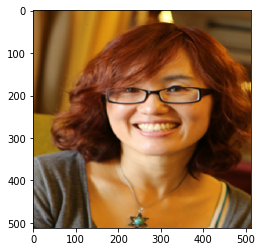

In [74]:
evaluate_reza(0)

In [69]:
metadata_reza.loc[0]=["001.jpg",'0','A woman wearing the glasses is smiling.']
metadata_reza.head()

,image_name,comment_number,comment
0,001.jpg,0,A woman wearing the glasses is smiling.
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


('two young guys with shaggy hair look at their hands while hanging out in the yard ',
 tensor(0.0272, grad_fn=<NllLossBackward0>))

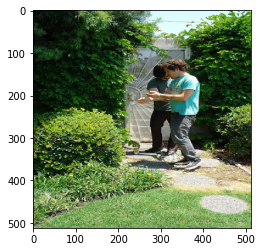

In [70]:
evaluate(0)

('several men in hard hats are operating a giant pulley they ',
 tensor(1.0744, grad_fn=<NllLossBackward0>))

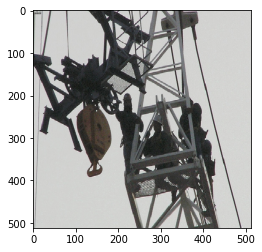

In [67]:
evaluate(5)

('a man a tennis ball during a serenading straw ',
 tensor(1.2652, grad_fn=<NllLossBackward0>))

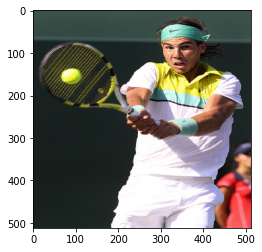

In [35]:
evaluate(70200)

In [38]:
image_arr.shape

(3072,)